## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [89]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [90]:
#Read the A\B test dataset to a dataframe
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [95]:
#counting the total number of rows in the dataset 
df.shape[0]

294478

c. The number of unique users in the dataset.

In [96]:
#counting the number of unique users
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [97]:
#calculating the overall proportion of the users that converted
df.query("converted ==1").user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [98]:
#counting rows where new_page and treatment aren't aligned.
df.query("(group == 'treatment' & landing_page != 'new_page')|(group != 'treatment' & landing_page == 'new_page') ").shape[0]

3893

f. Do any of the rows have missing values?

In [99]:
df.info()
#There is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [100]:
#Selecting only rows where treatment is aligned with new_page and control is aligned with old_page
df2 = df.query("(group =='treatment' & landing_page =='new_page')|(group =='control' & landing_page =='old_page')")

In [101]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [102]:
#counting the number of unique user_ids in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [103]:
#finding the original user_id that has a duplicated data.
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [104]:
#finding the data for the duplicated row user_id.
df2[df2.duplicated('user_id',keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [105]:
#droping the duplicated row and verifying that the datafram has no duplicates.
df2 = df2.drop_duplicates('user_id')
df2.user_id.count()==df2.user_id.nunique()

True

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [106]:
#exploring the cleaned version of the dataframe.
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [107]:
#calculating the propability of a user to convert regardless of the landing page.
p_conv = df2.query("converted ==1").shape[0]/df2.shape[0]
p_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [110]:
#calculating the probability of conversion for a user that belongs to the control group
p_conv_con = df2.query(" group=='control' & converted==1 ").shape[0]/df2.query(" group=='control' ").shape[0]
p_conv_con

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [111]:
#calculating the probability of conversion for a user that belongs to the treatment group
p_conv_treat = df2.query(" group=='treatment' & converted==1 ").shape[0]/df2.query(" group=='treatment' ").shape[0]
p_conv_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [112]:
#calculating the probability of the new page to appear
p_new_page = df2.query(" landing_page =='new_page' ").shape[0]/df2.shape[0]
p_new_page

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

<a id='conc_prob'></a>
>#### Conclusion:
>The probability of control users converting is higher than that for treatment users by a very small amount. Although that this may lead to a conclusion that the old_page is doing better, we still don't have sufficient evidence to confim this.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: P_{old} \geq P_{new} $$
$$H_1: P_{old} < P_{new} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [113]:
#calculate the P_new
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [114]:
#calculate p_old
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [115]:
#calculate the number of users in the treatment group
n_new = df2.query("group =='treatment'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [116]:
#calculate the number of users in the control group
n_old = df2.query("group =='control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [117]:
#simulate the conversion rate for treatment group with size = the number of users in that group 
#and probability = P_new 
new_page_converted = np.random.choice([1,0],size = n_new,p=[p_new,1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [118]:
#simulate the conversion rate for control group with size = the number of users in that group 
#and probability = P_old
old_page_converted = np.random.choice([1,0],size = n_old,p=[p_old,1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [119]:
#calculate the difference in the simulated conversion probabilities of both groups 
new_page_converted.mean()-old_page_converted.mean()

-0.0014268913976831776

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [120]:
#simulating a sampling distribution for the difference in convertion between the two pages 
#over 10,000 iterations. 
#initialize an empty list to store the calculated difference in probability out of each iteration.
p_diffs = []
#iterate 10,000 times, calculated the simulated difference and accumulate it in p_diffs
for _ in range(10000):
    new_page_converted = np.random.choice([1,0],size = n_new,p=[p_new,1-p_new])
    old_page_converted = np.random.choice([1,0],size = n_old,p=[p_old,1-p_old])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())    
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

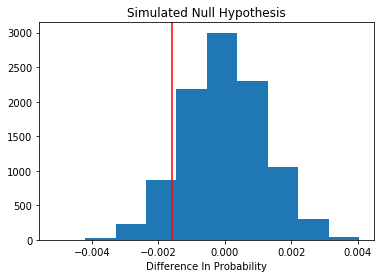

In [124]:
#calculate the observed difference
obs_diff = p_conv_treat-p_conv_con
#convert the simulated difference p_diffs to a numpy array
p_diffs = np.array(p_diffs)
#plot the p_diffs on a histogram marking the obsereverd difference with a red vertical line
plt.hist(p_diffs);
plt.title("Simulated Null Hypothesis")
plt.xlabel("Difference In Probability")
plt.axvline(obs_diff,color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [125]:
#calculate the proportion of p_diffs values that are greater than the observed difference.
(p_diffs > obs_diff).mean()

0.90439999999999998

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>This is called the p-value, which is 0.9014 and this is higher than the type 1 error rate ($\alpha$) of 5%. Therefore we fail to reject the null and we can't find sufficient evidence to say that the new page is better than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [126]:
#import the statsmodels.api module
import statsmodels.api as sm
#calculate the number of conversions for the old and new pages
convert_old = df2.query(" group=='control' & converted == 1 ")['converted'].count()
convert_new = df2.query(" group=='treatment' & converted == 1 ")['converted'].count()
#the number of users associated with each page is already calculated before.
#n_old = n_old
#n_new = n_new

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [127]:
#calculating the z_score and p_value from the ztest model
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

In [128]:
from scipy.stats import norm

norm.ppf(1-(0.05/2)) # calculates the critical value at 95% confidence

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>Since the z-score is less than the critical value so we fail to reject the null. So the conclusion along with the resulting p-value are aligned with previous results.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>It's considered categorical, so we use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [129]:
#create a new dataframe d_reg to be used in our regression approach computations and copy it's values from the previous df2
df_reg=df2
#create dummy variables for both control and treatment groups from the group column 
#and store the dummy variable of the treatment group in ab_page 
df_reg[['control','ab_page']]= pd.get_dummies(df2['group'])
#create an intercept column
df_reg['intercept']=1
#explore the dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted,control,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [130]:
#compute and fit a logistic regression model
log_mod = sm.Logit(df_reg['converted'],df_reg[['intercept','ab_page']])
res = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [131]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:               8.077e-06
Time:                        13:15:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>The p-value associated with the ab_page is 0.190, which is still higher than $\alpha$ and that means we also fail to reject the null hypothesis. And it is different because we are using a different hypothesis and we don't have a sufficient evidence that any of the pages has a better converting rate.
><br>The null hypothesis is that the converted rates for both the new page and the old page is the same. While the alternative hypothesis is that the new page results in a higher converted rate than the old page.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Other factors (predictor variables) can also influence our response. These variables for example can be, the time of visit whether it's during the weekday or weekend or the time of visit during the day, country of the user, gender, or age group.
><br>The disadvantage of considering multiple predictors is that we may fall in a multi-collinearity situation where some of these predictors are correlated with one another, therefore our respose isn't accurate and then we need to eliminate those dependent variables, which we can identify using the VIF (Variance Inflation Factor).

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [132]:
#read the countries dataset and store it in df_countries dataframe
df_countries = pd.read_csv("countries.csv")
#Join the countries table with the df_reg table and store the result in a new dataframe df_new
df_new = df_reg.join(df_countries.set_index('user_id'),on='user_id')
df_new.head()

,user_id,timestamp,group,landing_page,converted,control,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US


In [133]:
#explore the listed countries
df_new.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [134]:
#create dummy variables from country
df_new = df_new.join(pd.get_dummies(df_new['country']))
df_new.head()

,user_id,timestamp,group,landing_page,converted,control,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US,0,0,1


In [135]:
#fit a logistic regression model
log_mod1= sm.Logit(df_new['converted'],df_new[['intercept','CA','UK']])
log_mod1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:               1.521e-05
Time:                        13:18:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [136]:
#Now let's add an interaction between ab_page and each of the 3 countries
df_new['ab_CA']=df_new['ab_page']*df_new['CA']
df_new['ab_UK']=df_new['ab_page']*df_new['UK']
df_new['ab_US']=df_new['ab_page']*df_new['US']

In [137]:
#Let's fit a regression model for each interaction term
log_int_CA= sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','ab_CA']])
log_int_CA.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:               2.567e-05
Time:                        13:19:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1409
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9880      0.008   -240.457      0.000      -2.004      -1.972
ab_page       -0.0123      0.012     -1.049      0.294      -0.035       0.011
CA            -0.0160      0.037     -0.429      0.668      -0.089       0.057
ab_CA         -0.0552      0.053     -1.034      0.301      -0.160       0.049
==============================================================================
"""

In [138]:
log_int_UK= sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','ab_UK']])
log_int_UK.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:               2.036e-05
Time:                        13:19:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2278
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9876      0.009   -213.551      0.000      -2.006      -1.969
ab_page       -0.0236      0.013     -1.788      0.074      -0.050       0.002
UK            -0.0046      0.019     -0.247      0.805      -0.041       0.032
ab_UK          0.0345      0.026      1.307      0.191      -0.017       0.086
==============================================================================
"""

In [139]:
log_int_US= sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','ab_US']])
log_int_US.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:               1.077e-05
Time:                        13:19:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.5143
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9942      0.015   -135.158      0.000      -2.023      -1.965
ab_page       -0.0019      0.021     -0.093      0.926      -0.043       0.039
US             0.0077      0.018      0.436      0.663      -0.027       0.042
ab_US         -0.0186      0.025     -0.746      0.456      -0.068       0.030
==============================================================================
"""

>According to the results above, all regression models for the interaction between the ab_page and each of the 3 countries have a p-value that is higher than $\alpha$. Therefore the ineraction between the country and page showed no significant impact on conversion.

> ### Conclusion:
>- From the above analysis using different regression models, we failed to reject the null hypothesis. Therefore we conclude that the old page is better than the new page.
>- This result also aligns with the first conclusion we drew from calculating the probability of a control user to convert, which was higher than that for a treatment user to convert, [here](#conc_prob).

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [140]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0